In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("TRAIN3.csv", index_col = 0)
df.head(2)

cut color clarity  depth  table     x     y     z  price  \
carat                                                                 
0.30   Premium     D     SI2   62.4   58.0  4.31  4.28  2.68  6.353   
1.01     Ideal     E    VVS2   62.7   56.0  6.42  6.46  4.04  9.183   

       cut_encoded  color_encoded  clarity_encoded  
carat                                               
0.30             1              5                0  
1.01             4              6                5

In [3]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    29568.000000
mean         7.702887
std          0.976932
min          5.787000
25%          6.809000
50%          7.694000
75%          8.505000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    7392.000000
mean        7.702766
std         0.985273
min         5.817000
25%         6.801000
50%         7.689000
75%         8.513250
max         9.842000
Name: price, dtype: float64


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.1 µs


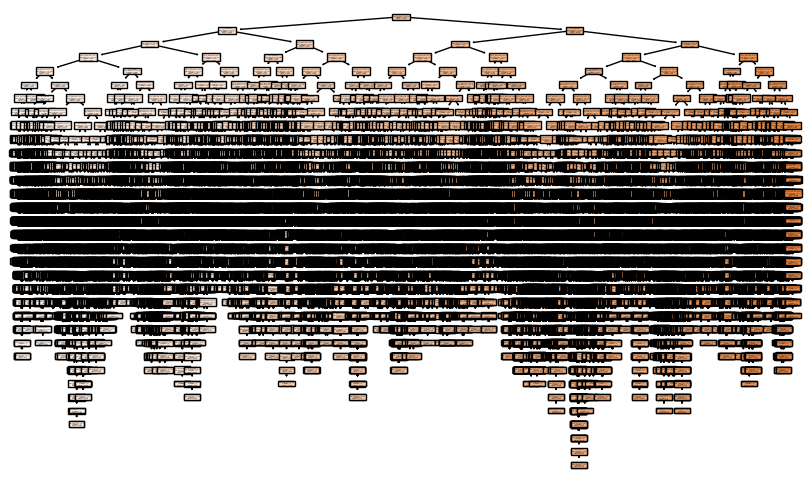

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

2.8284271247461903

In [9]:
# max depth

print(regressor.tree_.max_depth)

33


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

MAE       MSE      RMSE        R2    set            modelo
0  0.085523  0.014853  0.121875  0.984697   test  Decission Tree I
1  0.000224  0.000019  0.004390  0.999980  train  Decission Tree I

In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.267, test=-0.259) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.211, test=-0.208) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.080, test=-0.082) total time=   0.1s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.351, test=-0.357) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.363, test=-0.363) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.121, test=-0.124) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.421, test=-0.425) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=

[CV 9/10] END max_depth=4, max_features=3, min_samples_split=10;, score=(train=-0.062, test=-0.061) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=10;, score=(train=-0.052, test=-0.054) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.063, test=-0.064) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.059, test=-0.059) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.060, test=-0.062) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.060, test=-0.064) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.082, test=-0.083) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.089, test=-0.091) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_

[CV 2/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.051, test=-0.049) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.051, test=-0.051) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.050, test=-0.052) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.057, test=-0.059) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.057, test=-0.057) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.051, test=-0.055) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.052, test=-0.052) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.052, test=-0.050) total time=   0.0s
[CV 10/10] END max_depth=4, max_features

[CV 5/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.075, test=-0.077) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.048, test=-0.048) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.059, test=-0.064) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.055, test=-0.055) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.063, test=-0.063) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.066, test=-0.066) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.055, test=-0.056) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.048, test=-0.048) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_

[CV 7/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.043, test=-0.047) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.043, test=-0.042) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.042, test=-0.042) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.050, test=-0.051) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.040, test=-0.041) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.044, test=-0.043) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.040, test=-0.041) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.039, test=-0.042) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, 

[CV 8/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.039, test=-0.040) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.038, test=-0.037) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.039, test=-0.040) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.056, test=-0.059) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.081, test=-0.083) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.061, test=-0.067) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.147, test=-0.145) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.127, test=-0.126) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, m

[CV 9/10] END max_depth=6, max_features=3, min_samples_split=10;, score=(train=-0.033, test=-0.033) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_samples_split=10;, score=(train=-0.040, test=-0.040) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.038, test=-0.040) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.037, test=-0.038) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.038, test=-0.039) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.042, test=-0.043) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_

[CV 10/10] END max_depth=6, max_features=5, min_samples_split=50;, score=(train=-0.030, test=-0.031) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.031, test=-0.033) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.031, test=-0.032) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.036, test=-0.037) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.030, test=-0.032) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.030, test=-0.031) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.030, test=-0.030) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.038, test=-0.042) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=

[CV 4/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.037, test=-0.040) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.042, test=-0.045) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.046, test=-0.047) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.030, test=-0.033) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.038, test=-0.040) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.040, test=-0.042) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=50;, score=(train=-0.040, test=-0.044) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_

[CV 10/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.025, test=-0.026) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.030, test=-0.031) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.034, test=-0.035) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.024, test=-0.026) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.028, test=-0.029) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.024, test=-0.025) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=4, min_samples_split=100;, score=(train=-0.028, test=-0.030) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=

[CV 9/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.022, test=-0.023) total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=10)

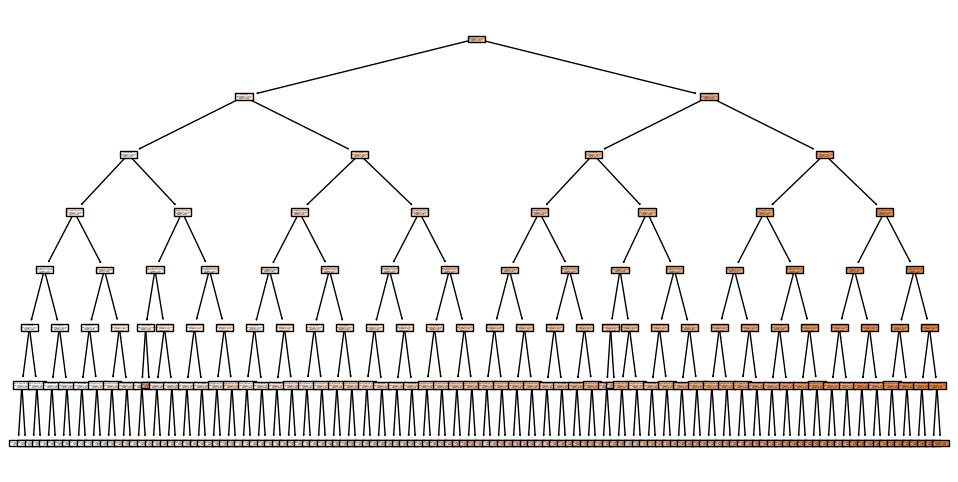

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [17]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.58
|   |--- y <= 4.92
|   |   |--- x <= 4.62
|   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |--- x <= 4.39
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.12]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.24]
|   |   |   |   |   |--- x >  4.39
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.25]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.38]
|   |   |   |   |--- color_encoded >  2.50
|   |   |   |   |   |--- x <= 4.24
|   |   |   |   |   |   |--- y <= 4.17
|   |   |   |   |   |   |   |--- value: [6.09]
|   |   |   |   |   |   |--- y >  4.17
|   |   |   |   |   |   |   |--- value: [6.27]
|   |   |   |   |   |--- x >  4.24
|   |   |   |   |   |   |--- x <= 4.40
|   |   |   |   |   |   |   |--- value: [6.47]
|   |   |   |   | 

In [19]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [20]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [21]:
dt_results2

MAE       MSE      RMSE        R2    set            modelo
0  0.117860  0.023101  0.151992  0.976200   test  Decision tree II
1  0.115693  0.022064  0.148540  0.976881  train  Decision tree II

# prueba predicciones 

In [22]:
df = pd.read_csv("realidad3.csv", index_col = 0)
X_realida = df.drop(['cut', 'color', 'clarity'], axis=1)


In [23]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.24715217, 8.37584649, 9.50677966, ..., 6.46869077, 8.80995161,
       8.00399057])

In [24]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

id     price
0          0  6.247152
1          1  8.375846
2          2  9.506780
3          3  7.897707
4          4  8.149173
...      ...       ...
12246  12246  8.544296
12247  12247  8.400821
12248  12248  6.468691
12249  12249  8.809952
12250  12250  8.003991

[12251 rows x 2 columns]

In [25]:
submision1.to_csv("valen3.csv", index=False)